In [1]:
# Dica para construção do ambiente com as ferramentas necessárias para executar a biblioteca

#conda create -n cptec python=3.10

#conda activate cptec
#!conda install -c conda-forge xarray matplotlib pycurl cfgrib netcdf4 pynio xarray matplotlib pycurl cfgrib netcdf4 pynio dask
#conda install -c anaconda ipykernel
!pip install cptec-model

  Using cached cptec_model-0.1.11-py3-none-any.whl
  Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl.metadata (61 kB)
  Using cached xesmf-0.8.10-py3-none-any.whl.metadata (3.9 kB)
  Using cached cf_xarray-0.10.6-py3-none-any.whl.metadata (16 kB)
  Using cached sparse-0.17.0-py2.py3-none-any.whl.metadata (5.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 3.8 MB/s  0:00:00 eta 0:00:01
Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl (38.7 MB)
Using cached xesmf-0.8.10-py3-none-any.whl (47 kB)
Using cached cf_xarray-0.10.6-py3-none-any.whl (70 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.4 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 MB 2.2 MB/s  0:00:19m0:00:0100:01
Using cached sparse-0.17.0-py2.py3-none-any.whl (259 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [cptec-model] [xesmf]ray]


In [1]:
# Import para os modelos disponiveis
# CPTEC_BAM, CPTEC_WRF, CPTEC_ETA, CPTEC_GFS

import cptecmodel.CPTEC_WRF as WRF
import cptecmodel.CPTEC_ETA as ETA
import cptecmodel.CPTEC_BRAMS as BRAMS

In [2]:
# Durante a inicialização do construtor informações sobre os dados são exibidas
# Entre elas informações de variaveis, niveis e frequência disponiveis para consulta

wrf = WRF.model()


#### US National Weather Service - NCEP (WMC) (ams_07km) #####

Forecast data available for reading between 20251104 and 20251114.

Surface variables: ['u10m', 'v10m', 't2m', 'slp', 'psfc', 'terrain', 'sbcape', 'sbcin', 'pw', 'precip', 'cssf', 'clsf', 'gust', 'refc', 'vis', 'refd', 'tsoil', 'soilw', 'soill', 'weasd', 'snowc', 'acpcp', 'ncpcp', 'ssrun', 'bgrun', 'gflux', 'lftx', 'lcdc', 'mcdc', 'hcdc', 'tcdc', 'dswrf', 'dlwrf', 'uswrf', 'ulwrf', 'hlcy', 'ustm', 'vstm', '4lftx', 'hpbl', 'plpl', 'land'].

Level variables:   ['t', 'u', 'v', 'rh', 'g', 'omega', 'pot', 'dpt', 'spfh', 'mslet'].

levels (hPa): ['1000', '975', '950', '925', '900', '875', '850', '825', '800', '775', '750', '700', '650', '600', '550', '500', '450', '400', '350', '300', '250', '200', '150', '100', '50'].

Frequency: hourly frequency [0,1,2,...,22,23].



In [3]:
wrf.daterange

DatetimeIndex(['2025-11-04', '2025-11-05', '2025-11-06', '2025-11-07',
               '2025-11-08', '2025-11-09', '2025-11-10', '2025-11-11',
               '2025-11-12', '2025-11-13', '2025-11-14'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2025021900'

# Variaveis 
vars = ['t2m', 'u10m', 'v10m']

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 24

ds = wrf.load(date=date, var=vars, steps=steps)
ds

<xarray.Dataset> Size: 330MB
Dimensions:    (time: 25, latitude: 1081, longitude: 1019)
Coordinates:
  * time       (time) datetime64[ns] 200B 2025-02-19 ... 2025-02-20
  * latitude   (latitude) float64 9kB -57.9 -57.83 -57.76 ... 17.56 17.63 17.7
  * longitude  (longitude) float64 8kB 269.3 269.4 269.5 ... 340.4 340.5 340.6
Data variables:
    t2m        (time, latitude, longitude) float32 110MB 4.585 4.585 ... 19.3
    v10m       (time, latitude, longitude) float32 110MB 9.904 9.944 ... -7.701
    u10m       (time, latitude, longitude) float32 110MB 13.82 13.83 ... -3.954
Attributes:
    center:   National Institute for Space Research - INPE
    model:    The Weather Research and Forecasting (ams_07km)

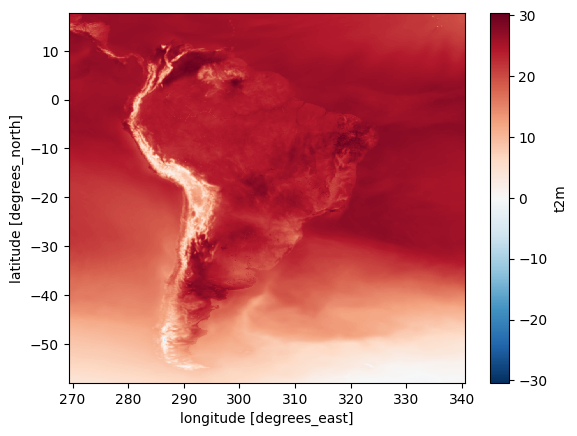

In [6]:
ds.t2m.mean(axis=0).plot()

In [7]:
import numpy as np 
mag = np.sqrt(ds.u10m**2+ ds.v10m**2)
mag

<xarray.DataArray (time: 25, latitude: 1081, longitude: 1019)> Size: 110MB
array([[[17.004227 , 17.035673 , 17.075274 , ..., 15.037744 ,
         15.089836 , 15.138139 ],
        [17.006536 , 17.051916 , 17.097345 , ..., 15.203221 ,
         15.228632 , 15.24995  ],
        [17.03444  , 17.079828 , 17.133377 , ..., 15.352426 ,
         15.374482 , 15.394428 ],
        ...,
        [ 1.4073051,  1.8392949,  2.3405428, ..., 10.400012 ,
         10.4099455, 10.387057 ],
        [ 1.5455322,  2.0604527,  2.6149025, ..., 10.506251 ,
         10.493242 , 10.460933 ],
        [ 1.7508441,  2.3017461,  2.8878486, ..., 10.579111 ,
         10.562908 , 10.507461 ]],

       [[17.537642 , 17.531618 , 17.539465 , ..., 15.316683 ,
         15.375832 , 15.425058 ],
        [17.350323 , 17.313862 , 17.319006 , ..., 15.186508 ,
         15.223314 , 15.288266 ],
        [17.41858  , 17.487722 , 17.56812  , ..., 15.451152 ,
         15.416429 , 15.390388 ],
...
        [ 1.0693033,  1.9310305,  3.0632753, ...,  7.9771605,
          8.194928 ,  8.424475 ],
        [ 1.0555593,  1.6732864,  2.8069959, ...,  8.114432 ,
          8.3440695,  8.514236 ],
        [ 0.976867 ,  1.4190046,  2.5694766, ...,  8.238532 ,
          8.446967 ,  8.576761 ]],

       [[11.001716 , 10.979257 , 10.957747 , ..., 10.435012 ,
         10.454933 , 10.482554 ],
        [10.868394 , 10.813326 , 10.757711 , ..., 10.169727 ,
         10.224439 , 10.289085 ],
        [10.804772 , 10.797283 , 10.7794895, ..., 10.002223 ,
         10.0575695, 10.110425 ],
        ...,
        [ 0.7346083,  1.3845847,  2.3076804, ...,  8.05638  ,
          8.284223 ,  8.571966 ],
        [ 0.8841964,  1.4593272,  2.3543684, ...,  8.231221 ,
          8.482169 ,  8.65341  ],
        [ 1.014342 ,  1.4255236,  2.4589586, ...,  8.371251 ,
          8.58676  ,  8.657066 ]]], shape=(25, 1081, 1019), dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 200B 2025-02-19 ... 2025-02-20
  * latitude   (latitude) float64 9kB -57.9 -57.83 -57.76 ... 17.56 17.63 17.7
  * longitude  (longitude) float64 8kB 269.3 269.4 269.5 ... 340.4 340.5 340.6

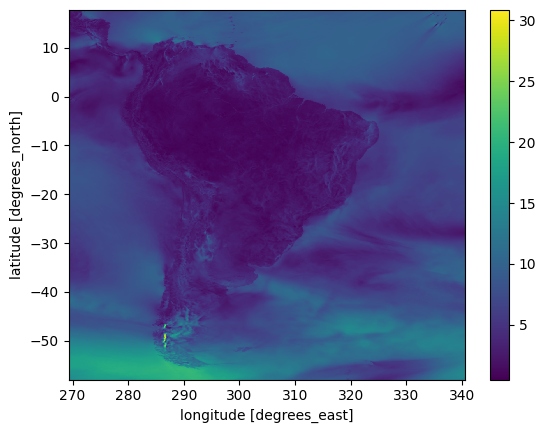

In [8]:
mag.mean(axis=0).plot()

In [9]:
# Exemplo selecionando uma area especifica

# Data da IC
date = '2025022000'

# Variaveis 
vars = ['terrain']

# Area selecionada altere reduce para true e altere os parametros de lat e lon
wrf.dict['area']['reduce'] = True
wrf.dict['area']['minlat'] = -35
wrf.dict['area']['maxlat'] = 0
wrf.dict['area']['minlon'] = 290
wrf.dict['area']['maxlon'] = 320

dsreg = wrf.load(date=date, var=vars, steps=1)

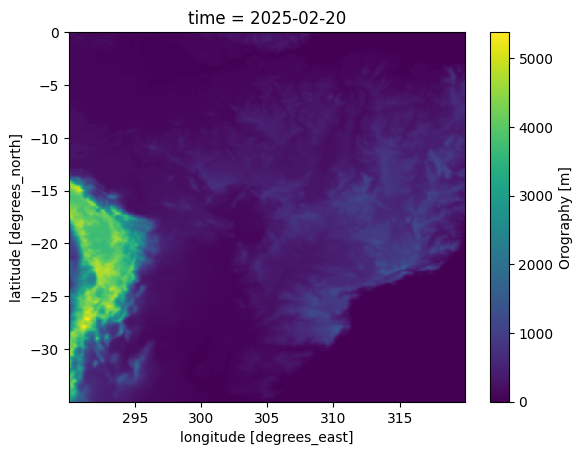

In [10]:
dsreg.terrain[0].plot()

In [11]:
# Para salvar netcdf com o resultado da requisição
ds.to_netcdf('wrf_regional.nc')

---
# Eta Model

In [12]:
eta = ETA.model()


#### Regional (ams_08km) #####

Forecast data available for reading between 20251103 and 20251113.

Forecast data available for reading between 20251103 and 20251113.

Surface variables: ['u10m', 'v10m', 't2m', 'slp', 'psfc', 'pw', 'precip', 'tsoil', 'soilm', 'tmax', 'tmin', 'dpt', 'acpcp', 'ncpcp', 'asnow', 'lhtfl', 'shtfl', 'gflux', 'ssrun', 'dswrf', 'dlwrf', 'uswrf', 'ulwrf', 'nswrt', 'nlwrt', 'lcdc', 'mcdc', 'hcdc', 'soilw'].

Level variables:   ['t', 'u', 'v', 'rh', 'g', 'omega', 'spfh', 'epot', 'cwat', 'cice'].

levels (hPa): ['1020', '1000', '950', '925', '900', '850', '800', '750', '700', '650', '600', '550', '500', '450', '400', '350', '300', '250', '200', '150', '100', '50'].

Frequency: hourly frequency [0,1,2,...,22,23].



In [ ]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2025021900'

# Variaveis 
vars = ['t2m']

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 72

ds = eta.load(date=date, var=vars, steps=steps)

eta.daterange

In [ ]:
ds72h = ds.sel(time='2025-02-22T00:00:00')

ds72h

In [ ]:
ds72h.t2m.plot()

---
# BRAMS Model

In [ ]:
brams = BRAMS.model()

In [ ]:
brams.ftppath

In [ ]:
brams.dict

In [ ]:
brams.dict['variables']

In [ ]:
brams.dict['variables']['precip']

dsprec = brams.load(date='2025022000', steps=72)

dsprec